In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#%config Completer.use_jedi = False


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Regresión con procesos gaussianos

Una variable aleatoria $X$ presenta una distribución gaussiana con promedio $\mu$ y varianza $\sigma^{2}$
si su función de densidad de probabilidad es:
$$
P_{X}(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp{\left(-\frac{(x-\mu)^{2}}{2\sigma^{2}}\right)}
$$

In [2]:
def dist(x, mu, sigma2):
    return((1/(np.sqrt(2*np.pi*sigma2))*np.exp(-(x-mu)**2/(2*sigma2))))

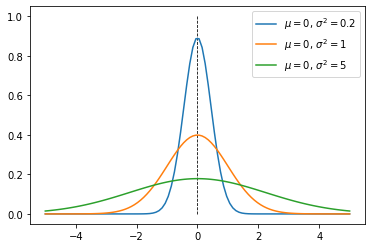

In [3]:
xs=np.linspace(-5,5,100)

plt.plot(xs,dist(xs,0,0.2),label="$\mu=0$, $\sigma^{2}=0.2$")
plt.plot(xs,dist(xs,0,1),label="$\mu=0$, $\sigma^{2}=1$")
plt.plot(xs,dist(xs,0,5),label="$\mu=0$, $\sigma^{2}=5$")
plt.vlines(0,0,1,linestyle="dashed",color="black",linewidth=0.8)
plt.legend();

Como cualquier distribución gaussiana queda caracterizada por los parámetros $\mu$ y $\sigma^{2}$, se puede denotar como:
$$
P_{X}(x)=\mathcal{N}(\mu,\sigma^{2})
$$

Para dos variables aleatorias con distibuciones gaussianas se tiene una distribución multivariada. El parámetro $\mu$ se convierte en un vector con los promedios y $\sigma^{2}$ en una matriz de covarianza con la información de correlación entre las variables:
$$
P_{X_{1},X_{2}}(x,y)=\mathcal{N}\left(\left[\begin{matrix}\mu_1\\\mu_2\end{matrix}\right],
\left[\begin{matrix}\sigma_{X_{1}}^{2}&\sigma_{X_{1},x_{2}}^{2}\\\sigma_{X_{2},x_{1}}^{2}&\sigma_{X_{2}}^{2}\end{matrix}\right]\right)
$$

Lo anterior se puede generalizar hasta el caso de infinitas variables aleatorias donde $\mu$ se transforma en una función de promedios $m(x)$ y la matriz de covarianza en una función de covarianza $k(x,x')$, conocida como kernel:
$$
f(x)\sim\mathcal{GP}(m(x),k(x,x'))
$$
Esto es conocido como un proceso gaussiano y se define como una colección de variables aleatorias en donde cada subconjunto de ellas tiene una distribución gaussiana.
En conjunto con herramientas de estadistica bayesiana, tienen aplicaciones en problemas de regresión y clasificación.

# Datos

In [4]:
data=pd.read_table('Points_chi2_example_cov.txt',sep='\s+')

In [6]:
# Variable independiente
x=np.atleast_2d(np.asarray(data)[:,0]).T

In [7]:
# Variable dependiente
y=np.asarray(data)[:,1]

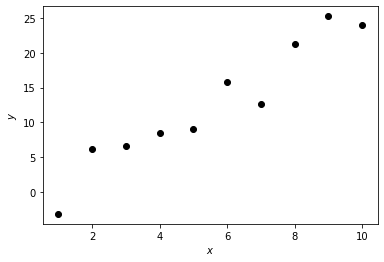

In [8]:
plt.scatter(x,y,color="black")
plt.xlabel("$x$")
plt.ylabel("$y$");

# Proceso gaussiano

In [9]:
# Prior
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Estimación del modelo

In [10]:
# Inferencia
gp.fit(x, y);

# Predicciones

In [14]:
# Valores donde se desea hacer la predicción
xs = np.atleast_2d(np.linspace(1, 10, 1000)).T

# Predicciones y desv. est. de cada una
y_pred, sigma = gp.predict(xs, return_std=True)


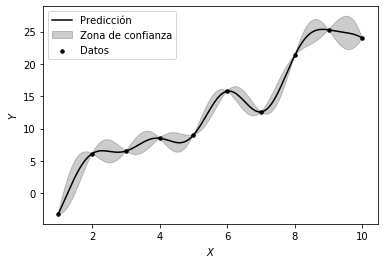

In [15]:
plt.scatter(x,y,color="black",s=12,label=u'Datos')
plt.plot(xs, y_pred, 'b-', label=u'Predicción',color="black")
plt.fill(np.concatenate([xs, xs[::-1]]),
         np.concatenate([y_pred - 1.96 * sigma,
                        (y_pred + 1.96 * sigma)[::-1]]), color="black",
         alpha=.2, ec='None', label='Zona de confianza'
        )
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.legend(loc='upper left')
plt.savefig("LinealErrorGP");

## Con varianzas en los datos

In [16]:
import random
dy = np.random.normal(5,2*np.random.rand(len(y)))

In [17]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel,alpha=dy**2, n_restarts_optimizer=10)

gp.fit(x, y)

y_pred, sigma = gp.predict(xs, return_std=True)

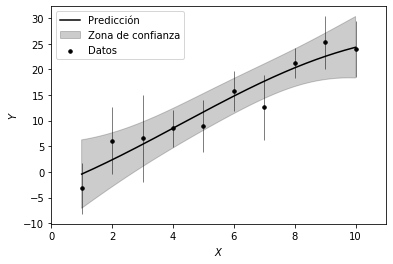

In [18]:
plt.scatter(x,y,color="black",s=12,label=u'Datos')
plt.errorbar(x.ravel(), y, dy,linestyle="None", elinewidth=0.5,
            color="black")
plt.plot(xs, y_pred, 'b-', label=u'Predicción',color="black")
plt.fill(np.concatenate([xs, xs[::-1]]),
         np.concatenate([y_pred - 1.96 * sigma,
                        (y_pred + 1.96 * sigma)[::-1]]), color="black",
         alpha=.2, ec='None', label='Zona de confianza'
        )
plt.xlabel('$X$')
plt.ylabel('$Y$')
#plt.ylim(0, 400)
plt.xlim(0,11)
#plt.title("Modelo con procesos gaussianos")
plt.legend(loc='upper left')
#plt.savefig("LinealErrorGP");

### Referencias

* https://peterroelants.github.io/posts/gaussian-process-tutorial/
* https://docs.w3cub.com/scikit_learn/auto_examples/gaussian_process/plot_gpr_noisy_targets
* http://www.gaussianprocess.org/gpml/chapters/RW.pdf

# Importancia de los Kernels

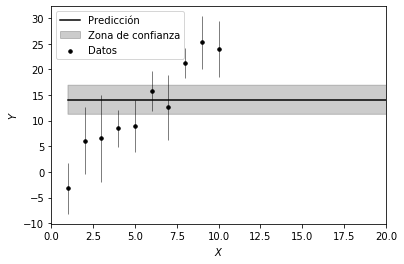

In [19]:
from sklearn.gaussian_process.kernels import ExpSineSquared as ess
from sklearn.gaussian_process.kernels import WhiteKernel
kernel = C(1.0, (1e-3, 1e3)) 

gp = GaussianProcessRegressor(kernel=kernel,alpha=dy**2, n_restarts_optimizer=30)

gp.fit(x, y)

y_pred, sigma = gp.predict(xs, return_std=True)

xs = np.atleast_2d(np.linspace(1, 100, 1000)).T

plt.scatter(x,y,color="black",s=12,label=u'Datos')
plt.errorbar(x.ravel(), y, dy,linestyle="None", elinewidth=0.5,
            color="black")
plt.plot(xs, y_pred, 'b-', label=u'Predicción',color="black")
plt.fill(np.concatenate([xs, xs[::-1]]),
         np.concatenate([y_pred - 1.96 * sigma,
                        (y_pred + 1.96 * sigma)[::-1]]), color="black",
         alpha=.2, ec='None', label='Zona de confianza'
        )
plt.xlabel('$X$')
plt.ylabel('$Y$')
#plt.ylim(0, 400)
plt.xlim(0,20)
#plt.title("Modelo con procesos gaussianos")
plt.legend(loc='upper left')
#plt.savefig("LinealErrorGP");

Text(0, 0.5, 'target')

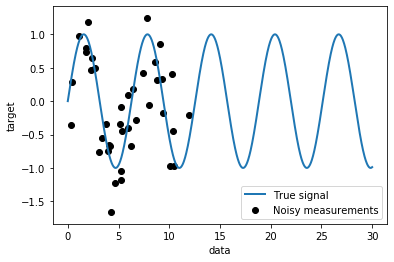

In [20]:
#generamos datos con periodicidad
rng = np.random.RandomState(0)
data = np.linspace(0, 30, num=1_000).reshape(-1, 1)
target = np.sin(data).ravel()
dy = np.random.normal(5,2*np.random.rand(40))

training_sample_indices = rng.choice(np.arange(0, 400), size=40, replace=False)
training_data = data[training_sample_indices]
training_noisy_target = target[training_sample_indices] + 0.5 * rng.randn(
    len(training_sample_indices)
)

plt.plot(data, target, label="True signal", linewidth=2)
plt.scatter(
        training_data,
        training_noisy_target,
        color="black",
        label="Noisy measurements")
plt.legend()
plt.xlabel("data")
plt.ylabel("target")

Kernel periódico (ExpSineSquared ó ess)

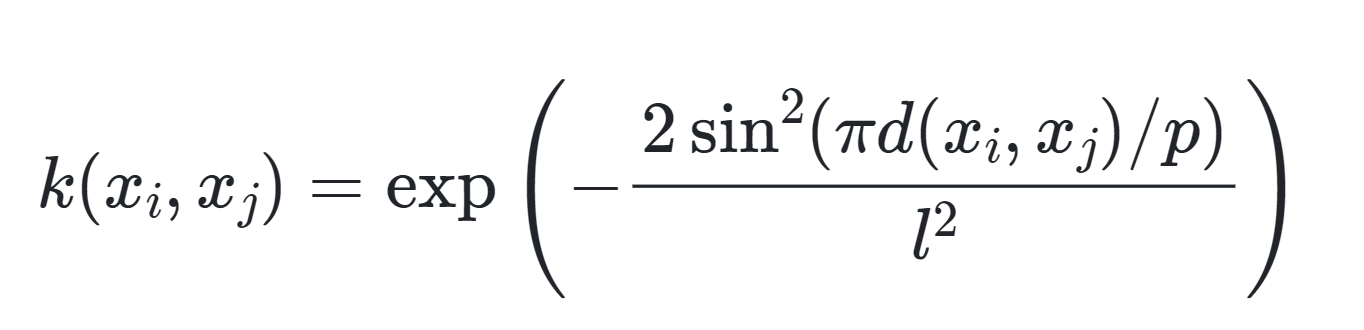

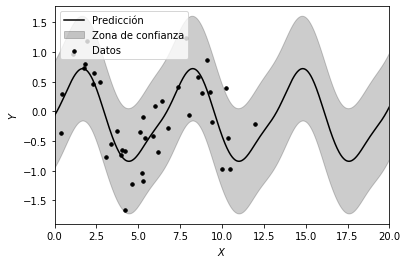

In [28]:
kernel = 1*ess() + WhiteKernel()
#kernel = 1*RBF() + WhiteKernel()


gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=50)
gp.fit(training_data, training_noisy_target)

y_pred, sigma = gp.predict(data, return_std=True)
x = training_noisy_target
xs = np.atleast_2d(np.linspace(0, 100, 1000)).T

plt.scatter(training_data, x,color="black",s=12,label=u'Datos')
#plt.errorbar(x.ravel(), y, dy,linestyle="None", elinewidth=0.5,
#            color="black")
plt.plot(data, y_pred, 'b-', label=u'Predicción',color="black")
plt.fill(np.concatenate([data, data[::-1]]),
         np.concatenate([y_pred - 1.96 * sigma,
                        (y_pred + 1.96 * sigma)[::-1]]), color="black",
         alpha=.2, ec='None', label='Zona de confianza'
        )
plt.xlabel('$X$')
plt.ylabel('$Y$')
#plt.ylim(0, 400)
plt.xlim(0,20)
#plt.title("Modelo con procesos gaussianos")
plt.legend(loc='upper left')